# Pandas Tutorial
Disclaimer: This tutorial is adapted from online tutorials on Dataquest website.
Take a look at the good online material for further insights.

In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import math

### Import Data
Data can be read from many formats. Most common ones, csv and excel, are read in one shot using `read_csv` and `read_excel` data.

The `head(n)` method shows the first `n` rows (`n=5` by default).

In [2]:
reviews = pd.read_csv(os.path.join("..", "data", "ign.csv"))
reviews.head(4)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11


In [3]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into Dat

In [3]:
thanks = pd.read_excel(os.path.join("..", "data", 'thanksgiving_data.xls'))
thanks.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


The excel file is good, but the csv has a discrepancy: the columns are shifted one position on the right w.r.t. the labels. Here is how to fix it (see section below for explanation of the `iloc` method).

In [17]:
thanks_bad = pd.read_csv(os.path.join("..", "data", 'thanksgiving_data.csv'))
col = thanks_bad.columns
thanks = thanks_bad.iloc[:,1:]
thanks.columns = col[0:-1]
thanks.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


### Indexing
Indexing data in a table is of utmost importance. Pandas supports several methods.
* `iloc` - integer based indexing: refers to rows and columns by their position, expressed an an integer starting from zero. 
* `loc` - label based indexing: uses row and column names.
* Boolean Indexing, using boolean masks
Row names are stored in the field `index` of a data frame. Column names are stored in the field `columns`.

In [6]:
reviews.index

RangeIndex(start=0, stop=18625, step=1)

In [7]:
reviews.iloc[0:10,0:2] #first ten rown, first two columns

,Unnamed: 0,score_phrase
0,0,Amazing
1,1,Amazing
2,2,Great
3,3,Great
4,4,Great
5,5,Good
6,6,Awful
7,7,Amazing
8,8,Awful
9,9,Good


In [8]:
restricted_data = reviews.loc[10:20]
restricted_data

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
10,10,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,Fighting,N,2012,9,11
11,11,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/xbox-360-124581,Xbox 360,7.5,Fighting,N,2012,9,11
12,12,Good,Wild Blood,/games/wild-blood/iphone-139363,iPhone,7.0,NaN,N,2012,9,10
13,13,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/xbox-360-129276,Xbox 360,9.0,"Action, Adventure",Y,2012,9,7
14,14,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/pc-143761,PC,9.0,"Action, Adventure",Y,2012,9,7
15,15,Okay,Home: A Unique Horror Adventure,/games/home-a-unique-horror-adventure/mac-2001...,Macintosh,6.5,Adventure,N,2012,9,6
16,16,Okay,Home: A Unique Horror Adventure,/games/home-a-unique-horror-adventure/pc-137135,PC,6.5,Adventure,N,2012,9,6
17,17,Great,Avengers Initiative,/games/avengers-initiative/iphone-141579,iPhone,8.0,Action,N,2012,9,5
18,18,Mediocre,Way of the Samurai 4,/games/way-of-the-samurai-4/ps3-23516,PlayStation 3,5.5,"Action, Adventure",N,2012,9,3
19,19,Good,JoJo's Bizarre Adventure HD,/games/jojos-bizarre-adventure/xbox-360-137717,Xbox 360,7.0,Fighting,N,2012,9,3


In [9]:
restricted_data.loc[10:12]
# restricted_data.loc[0:2] does not work, one needs to use proper row labels. 

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
10,10,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,Fighting,N,2012,9,11
11,11,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/xbox-360-124581,Xbox 360,7.5,Fighting,N,2012,9,11
12,12,Good,Wild Blood,/games/wild-blood/iphone-139363,iPhone,7.0,NaN,N,2012,9,10


In [18]:
reviews.loc[0:10,"title"]

0                               LittleBigPlanet PS Vita
1     LittleBigPlanet PS Vita -- Marvel Super Hero E...
2                                  Splice: Tree of Life
3                                                NHL 13
4                                                NHL 13
5                             Total War Battles: Shogun
6                                   Double Dragon: Neon
7                                          Guild Wars 2
8                                   Double Dragon: Neon
9                             Total War Battles: Shogun
10                              Tekken Tag Tournament 2
Name: title, dtype: object

In [19]:
reviews.loc[0:10,["title","score"]]

,title,score
0,LittleBigPlanet PS Vita,9.0
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,9.0
2,Splice: Tree of Life,8.5
3,NHL 13,8.5
4,NHL 13,8.5
5,Total War Battles: Shogun,7.0
6,Double Dragon: Neon,3.0
7,Guild Wars 2,9.0
8,Double Dragon: Neon,3.0
9,Total War Battles: Shogun,7.0


In [12]:
reviews[["title","score"]]

,title,score
0,LittleBigPlanet PS Vita,9.0
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,9.0
2,Splice: Tree of Life,8.5
3,NHL 13,8.5
4,NHL 13,8.5
...,...,...
18620,Tokyo Mirage Sessions #FE,7.6
18621,LEGO Star Wars: The Force Awakens,9.0
18622,Star Ocean: Integrity and Faithlessness,5.8
18623,Inside,10.0


In [13]:
mask = reviews["score"] >= 9.5
mask

0        False
1        False
2        False
3        False
4        False
         ...  
18620    False
18621    False
18622    False
18623     True
18624     True
Name: score, Length: 18625, dtype: bool

In [14]:
cool_games = reviews[mask]["title"]
print("Fraction of cool games")
print(len(cool_games)/len(reviews["title"]))
cool_games

Fraction of cool games
0.020671140939597314


33                   Pokemon White Version 2
35                   Pokemon Black Version 2
52       The World Ends with You: Solo Remix
54       The World Ends with You: Solo Remix
135        Zero Escape: Virtue's Last Reward
                        ...                 
18511                                 Inside
18562                Odin Sphere Leifthrasir
18563                Odin Sphere Leifthrasir
18623                                 Inside
18624                                 Inside
Name: title, Length: 385, dtype: object

In [15]:
#remove the first column
reviews = reviews.iloc[:,1:]
reviews

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
...,...,...,...,...,...,...,...,...,...,...
18620,Good,Tokyo Mirage Sessions #FE,/games/fire-emblem-x-shin-megami-tensei/wii-u-...,Wii U,7.6,RPG,N,2016,6,29
18621,Amazing,LEGO Star Wars: The Force Awakens,/games/lego-star-wars-the-force-awakens/ps4-20...,PlayStation 4,9.0,"Action, Adventure",Y,2016,6,29
18622,Mediocre,Star Ocean: Integrity and Faithlessness,/games/star-ocean-5/ps4-20035681,PlayStation 4,5.8,RPG,N,2016,6,28
18623,Masterpiece,Inside,/games/inside-playdead/xbox-one-121435,Xbox One,10.0,Adventure,Y,2016,6,28


### Series and DataFrames
Tables are stored in a `DataFrame` object. Each column of a DataFrame is a `Series` object, basically anumpy array supporting mixed data types (casted to object type). Here are different ways to create Series and DataFrames. Check Pandas documentation  for further details.  

In [ ]:
s1 = pd.Series([1,2,3,4,5])
s2 = pd.Series(['a','b','c','d','e'])
s3 = pd.Series([1,'a',1.0])

In [21]:
s4 = pd.Series([1,2])
s5 = pd.Series(['a','b'])
print(s4)
print(s5)
pd.DataFrame([s4,s5],index=["c","d"])

0    1
1    2
dtype: int64
0    a
1    b
dtype: object


,0,1
c,1,2
d,a,b


In [22]:
d = {"president": ["Salvini","Di Maio","Paperino","Maga Mago"], "chance": [1,2,8,12] }
df = pd.DataFrame(d,columns=["president","chance"])
df

,president,chance
0,Salvini,1
1,Di Maio,2
2,Paperino,8
3,Maga Mago,12


Here are some functions you can use to get information about a data frame and to do some maths with numeric columns.

In [23]:
reviews.mean()

Unnamed: 0       9312.000000
score               6.950459
release_year     2006.515329
release_month       7.138470
release_day        15.603866
dtype: float64

In [24]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18625 non-null  int64  
 1   score_phrase    18625 non-null  object 
 2   title           18625 non-null  object 
 3   url             18625 non-null  object 
 4   platform        18625 non-null  object 
 5   score           18625 non-null  float64
 6   genre           18589 non-null  object 
 7   editors_choice  18625 non-null  object 
 8   release_year    18625 non-null  int64  
 9   release_month   18625 non-null  int64  
 10  release_day     18625 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 1.6+ MB


In [25]:
reviews["score"].describe()

count    18625.000000
mean         6.950459
std          1.711736
min          0.500000
25%          6.000000
50%          7.300000
75%          8.200000
max         10.000000
Name: score, dtype: float64

In [33]:
reviews.mean(axis=1) # axis = 1 => mean of columns

0         408.40
1         408.60
2         408.70
3         408.70
4         408.90
          ...   
18620    4135.72
18621    4136.20
18622    4135.56
18623    4136.60
18624    4136.80
Length: 18625, dtype: float64

In [34]:
reviews.median()

Unnamed: 0       9312.0
score               7.3
release_year     2007.0
release_month       8.0
release_day        16.0
dtype: float64

In [35]:
reviews["score"]/2*3

0        13.50
1        13.50
2        12.75
3        12.75
4        12.75
         ...  
18620    11.40
18621    13.50
18622     8.70
18623    15.00
18624    15.00
Name: score, Length: 18625, dtype: float64

### Plotting in Pandas
`plot` method of `DataFrame` class is the way to go. The option `kind` allows the selection of the plot type.

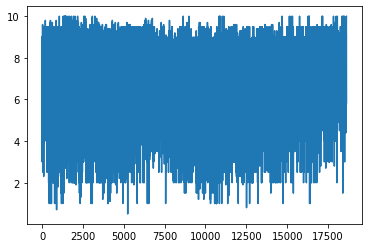

In [36]:
reviews["score"].plot()
#default is line plot - good for timeseries data.

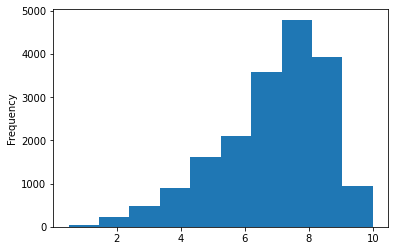

In [37]:
reviews["score"].plot(kind='hist')

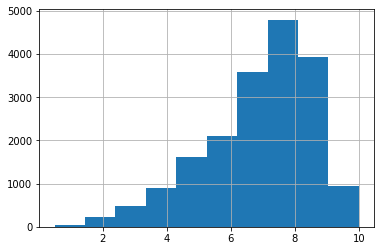

In [38]:
reviews["score"].hist()

### Summarising Data
`unique` and `value_counts` are good methods to get a glimpse on categorical columns.

In [39]:
thanks["Do you celebrate Thanksgiving?"].unique()

array(['Yes', 'No'], dtype=object)

In [40]:
thanks["Do you celebrate Thanksgiving?"].value_counts()

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64

In [41]:
thanks["What is your gender?"].value_counts(dropna=False)

Female    544
Male      481
NaN        33
Name: What is your gender?, dtype: int64

### Applying functions to Series and DataFrames
One can use the method `apply` of the Series object, which applies the function (passed as argument) to each element of the Series. Functions can be numpy or python functions, or customly defined. Lambda (implicit) functions are usable as well. 



In [48]:
thanks["gender"] = thanks["What is your gender?"]

In [49]:
def gender_code(gstr):
    if (pd.isnull(gstr)):
        return gstr
    elif gstr == "Female":
        return 1
    else:
        return 0

thanks["gender"].apply(gender_code)
thanks["gender"].value_counts(dropna=False)

Female    544
Male      481
NaN        33
Name: gender, dtype: int64

Let's convert the information about income into numerics, so we can plot it. First we take a look at the different categories and figure out how to turn them into a number.  

In [50]:
thanks["income"] = thanks["How much total combined money did all members of your HOUSEHOLD earn last year?"]

In [51]:
thanks["income"].unique()

array(['$75,000 to $99,999', '$50,000 to $74,999', '$0 to $9,999',
       '$200,000 and up', '$100,000 to $124,999', '$25,000 to $49,999',
       'Prefer not to answer', '$10,000 to $24,999',
       '$150,000 to $174,999', '$175,000 to $199,999',
       '$125,000 to $149,999', nan], dtype=object)

In [52]:
value = '$150,000 to $174,999'
print(value)
value = value.replace(",", "").replace("$", "")
print(value)
income_high, income_low = value.split(" to ")
print( (int(income_high) + int(income_low)) / 2) 

$150,000 to $174,999
150000 to 174999
162499.5


In [53]:
def clean_income(value):
    if value == "$200,000 and up":
        return 200000
    elif value == "Prefer not to answer":
        return np.nan
    elif pd.isnull(value):
        return np.nan
    value = value.replace(",", "").replace("$", "")
    income_high, income_low = value.split(" to ")
    return (int(income_high) + int(income_low)) / 2

thanks["income"] = thanks["income"].apply(clean_income)

### Grouping Data with Pandas
Grouping data allows to aggregate data w.r.t. the values of one column, typically a  category, even hierarchically. The `groupby` method returns a collection of dataframes, which can be iterated on. 

In [78]:
sauce_str = "What type of cranberry saucedo you typically have?"
thanks[sauce_str].value_counts()
grouped = thanks.groupby(sauce_str)
grouped.size()

for name, group in grouped:
    print(name)
    print(group.shape)
    print(type(group))

Canned
(502, 67)
      RespondentID Do you celebrate Thanksgiving?  \
4       4337931983                            Yes   
6       4337924420                            Yes   
8       4337914977                            Yes   
11      4337893416                            Yes   
12      4337888291                            Yes   
...            ...                            ...   
1046    4335949486                            Yes   
1047    4335949169                            Yes   
1051    4335944854                            Yes   
1054    4335943173                            Yes   
1057    4335894916                            Yes   

     What is typically the main dish at your Thanksgiving dinner?  \
4                                              Tofurkey             
6                                                Turkey             
8                                                Turkey             
11                                               Turkey             
1

### Aggregating and Plotting
Numerical columns in grouped structures can be aggregated, so to visualise their mean, sum, and so on, by calling the `agg` function. You can specify which  columns in the grouped structure are aggregated, by selecting them, or pass a list of aggregating functions. 

In [55]:
grouped.agg(np.mean)

,RespondentID,income
What type of cranberry saucedo you typically have?,,
Canned,4.336699e+09,83823.403409
Homemade,4.336792e+09,94878.107287
None,4.336765e+09,78886.084034
Other (please specify),4.336763e+09,86629.978261


In [56]:
gr_income = grouped["income"].agg(np.mean)
gr_income

What type of cranberry saucedo you typically have?
Canned                    83823.403409
Homemade                  94878.107287
None                      78886.084034
Other (please specify)    86629.978261
Name: income, dtype: float64

In [57]:
grouped["income"].agg([np.mean,np.std])

,mean,std
What type of cranberry saucedo you typically have?,,
Canned,83823.403409,55835.478014
Homemade,94878.107287,62251.937645
None,78886.084034,54562.750866
Other (please specify),86629.978261,54175.781001


Plotting an aggregated grouped data can be easily done. Use the `bar` plot kind.

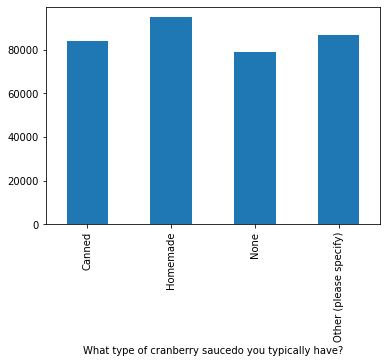

In [58]:
gr_income.plot(kind="bar")

In [59]:
grouped2 = thanks.groupby(["What type of cranberry saucedo you typically have?", "What is typically the main dish at your Thanksgiving dinner?"])
grouped2["income"].agg(np.mean)

What type of cranberry saucedo you typically have?  What is typically the main dish at your Thanksgiving dinner?
Canned                                              Chicken                                                          80999.600000
                                                    Ham/Pork                                                         77499.535714
                                                    I don't know                                                      4999.500000
                                                    Other (please specify)                                           53213.785714
                                                    Roast beef                                                       25499.500000
                                                    Tofurkey                                                        100713.857143
                                                    Turkey                                                 

In [60]:
grouped2["income"].agg([np.mean, np.sum, np.std]).head(10)

mean  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                  
Canned                                             Chicken                                              80999.600000   
                                                   Ham/Pork                                             77499.535714   
                                                   I don't know                                          4999.500000   
                                                   Other (please specify)                               53213.785714   
                                                   Roast beef                                           25499.500000   
                                                   Tofurkey                                            100713.857143   
                                                   Turkey                                               85242.682045   
Homemade                                           Chicken                                              19999.500000   
                                                   Ham/Pork                                             96874.625000   
                                                   I don't know                                                  NaN   

                                                                                                              sum  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...               
Canned                                             Chicken                                               404998.0   
                                                   Ham/Pork                                             1084993.5   
                                                   I don't know                                            4999.5   
                                                   Other (please specify)                                372496.5   
                                                   Roast beef                                            127497.5   
                                                   Tofurkey                                              704997.0   
                                                   Turkey                                              34182315.5   
Homemade                                           Chicken                                                59998.5   
                                                   Ham/Pork                                              387498.5   
                                                   I don't know                                               0.0   

                                                                                                                std  
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                
Canned                                             Chicken                                             75779.481062  
                                                   Ham/Pork                                            56645.063944  
                                                   I don't know                                                 NaN  
                                                   Other (please specify)                              29780.946290  
                                                   Roast beef                                          24584.039538  
                                                   Tofurkey                                            61351.484439  
                                                   Turkey                                              55687.436102  
Homemade                                           Chicken                                             16393.596311  
                                                   Ham/Pork                           

`agg` returns a single value. to count for each category, we need to apply a function to a group. Note that `apply` called from a DataFrame is applied by default to each column. Using the `axis=0` option, one can apply it to each row.

In [61]:
grouped = thanks.groupby("How would you describe where you live?")["What is typically the main dish at your Thanksgiving dinner?"]
grouped.apply(lambda x:x.value_counts())

How would you describe where you live?                        
Rural                                   Turkey                    189
                                        Other (please specify)      9
                                        Ham/Pork                    7
                                        I don't know                3
                                        Tofurkey                    3
                                        Turducken                   2
                                        Chicken                     2
                                        Roast beef                  1
Suburban                                Turkey                    449
                                        Ham/Pork                   17
                                        Other (please specify)     13
                                        Tofurkey                    9
                                        Chicken                     3
                           

### Pivot tables
Pivot Tables are a very common way of aggregating information of a table, in order to visualize it in a clearer way. 
Pandas supports pivot tables with the `pivot_table` method, having a certain amount of options which will be discussed below.  
We can define hierarchical aggregations on rows and columns, and specify which features will be aggregated and how.  

In [62]:
sales = pd.read_excel(os.path.join("..", "data", "sales-funnel.xlsx"))
sales.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [63]:
#this forces the Status column into a category type. 
sales["Status"] = sales["Status"].astype("category")
sales["Status"].cat.set_categories(["won","pending","presented","declined"],inplace=True)

In [64]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Account   17 non-null     int64   
 1   Name      17 non-null     object  
 2   Rep       17 non-null     object  
 3   Manager   17 non-null     object  
 4   Product   17 non-null     object  
 5   Quantity  17 non-null     int64   
 6   Price     17 non-null     int64   
 7   Status    17 non-null     category
dtypes: category(1), int64(3), object(4)
memory usage: 1.3+ KB


In [65]:
pd.pivot_table(sales,index=["Name"])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


`index` specifies how to aggregate on rows. Passing a list specifies an hierarchical grouping.

In [66]:
pd.pivot_table(sales,index=["Manager","Rep"])

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

`values` allows us to pick the features we want to aggregate and show on the table. By default, all numeric columns are shown.

In [67]:
pd.pivot_table(sales,index=["Manager","Rep"],values=["Price"])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

`aggfunc` specifies the aggregating function. We can also pass a list of functions.

In [68]:
pd.pivot_table(sales,index=["Manager","Rep"],values=["Price"],aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [69]:
pd.pivot_table(sales,index=["Manager","Rep"],values=["Price"],aggfunc=[np.mean,len])

mean   len
                                    Price Price
Manager       Rep                              
Debra Henley  Craig Booker   20000.000000     4
              Daniel Hilton  38333.333333     3
              John Smith     20000.000000     2
Fred Anderson Cedric Moss    27500.000000     4
              Wendy Yule     44250.000000     4

`column` specifies the features to group data on columns. In this way, we can build hierarchical indices both for rows and columns. In principle, one can group only on rows, just that group on rows and columns gives a better view of the data.

In [70]:
pd.pivot_table(sales,index=["Manager","Rep"],values=["Price"],columns=["Product"],
               aggfunc=[np.sum])

sum                             
                                Price                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

In [71]:
pd.pivot_table(sales,index=["Manager","Rep","Product"],values=["Price"],aggfunc=np.sum)

Price
Manager       Rep           Product            
Debra Henley  Craig Booker  CPU           65000
                            Maintenance    5000
                            Software      10000
              Daniel Hilton CPU          105000
                            Software      10000
              John Smith    CPU           35000
                            Maintenance    5000
Fred Anderson Cedric Moss   CPU           95000
                            Maintenance    5000
                            Software      10000
              Wendy Yule    CPU          165000
                            Maintenance    7000
                            Monitor        5000

`fill_value` allows us to choose how to visualize NaN, caused by the fact that some categories may be missing in a given group. Note that these are discarded automatically when grouping by row. 

In [72]:
pd.pivot_table(sales,index=["Manager","Rep"],values=["Price"],
               columns=["Product"],aggfunc=[np.sum],fill_value=0)

sum                             
                              Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

If we choose more features as values, we get a subdivision for each feature.

In [73]:
pd.pivot_table(sales,index=["Manager","Rep"],values=["Price","Quantity"],
               columns=["Product"],aggfunc=[np.sum],fill_value=0)

sum                                        \
                              Price                              Quantity   
Product                         CPU Maintenance Monitor Software      CPU   
Manager       Rep                                                           
Debra Henley  Craig Booker    65000        5000       0    10000        2   
              Daniel Hilton  105000           0       0    10000        4   
              John Smith      35000        5000       0        0        1   
Fred Anderson Cedric Moss     95000        5000       0    10000        3   
              Wendy Yule     165000        7000    5000        0        7   

                                                          
                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker            2       0        1  
              Daniel Hilton           0       0        1  
              John Smith              2       0        0  
Fred Anderson Cedric Moss             1       0        1  
              Wendy Yule              3       2        0

In [74]:
pd.pivot_table(sales,index=["Manager","Rep","Product"],
               values=["Price","Quantity"],aggfunc=[np.sum],fill_value=0)

sum         
                                          Price Quantity
Manager       Rep           Product                     
Debra Henley  Craig Booker  CPU           65000        2
                            Maintenance    5000        2
                            Software      10000        1
              Daniel Hilton CPU          105000        4
                            Software      10000        1
              John Smith    CPU           35000        1
                            Maintenance    5000        2
Fred Anderson Cedric Moss   CPU           95000        3
                            Maintenance    5000        1
                            Software      10000        1
              Wendy Yule    CPU          165000        7
                            Maintenance    7000        3
                            Monitor        5000        2

`margins=True` shows also the aggregated quantity over the dataset.

In [75]:
pd.pivot_table(sales,index=["Manager","Rep","Product"],values=["Price","Quantity"],
               aggfunc=[np.sum,np.mean],fill_value=0,margins=True)

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

In [76]:
table =  pd.pivot_table(sales,index=["Manager","Rep","Product"],values=["Price","Quantity"],
               aggfunc={"Quantity":len,"Price":np.sum},fill_value=0,margins=True)
table

Price  Quantity
Manager       Rep           Product                      
Debra Henley  Craig Booker  CPU           65000         2
                            Maintenance    5000         1
                            Software      10000         1
              Daniel Hilton CPU          105000         2
                            Software      10000         1
              John Smith    CPU           35000         1
                            Maintenance    5000         1
Fred Anderson Cedric Moss   CPU           95000         2
                            Maintenance    5000         1
                            Software      10000         1
              Wendy Yule    CPU          165000         2
                            Maintenance    7000         1
                            Monitor        5000         1
All                                      522000        17

If we save a pivot table, we can query it, and perform other operations. Check Pandas documentation for details.  

In [77]:
table.query('Manager == ["Debra Henley"]')

Price  Quantity
Manager      Rep           Product                      
Debra Henley Craig Booker  CPU           65000         2
                           Maintenance    5000         1
                           Software      10000         1
             Daniel Hilton CPU          105000         2
                           Software      10000         1
             John Smith    CPU           35000         1
                           Maintenance    5000         1